# Encuesta funcionarios públicos

## Preparación de ambiente

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import date
import warnings

warnings.filterwarnings("ignore")

## importar datos

In [3]:
df=pd.read_excel('BBDD Todos_rev.xlsx')
mt=pd.read_excel('Maestros.xlsx')

mt_indices=pd.read_excel('Maestros.xlsx',sheet_name='indices')
mt_servicios=pd.read_excel('Maestros.xlsx',sheet_name='servicios')

df=pd.merge(df,mt_indices,how='left',on='Indice')
df=pd.merge(df,mt_servicios,how='left',on='Servicio')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272168 entries, 0 to 272167
Data columns (total 10 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Servicio                                   272168 non-null  object
 1   Caracteristica de Comparacion              272168 non-null  object
 2   Valor de la Caracteristica de Comparacion  272168 non-null  object
 3   Indice                                     272168 non-null  object
 4   Indicador                                  272168 non-null  object
 5   Tipo                                       272168 non-null  object
 6   Resultado                                  272168 non-null  object
 7   Codificacion                               272168 non-null  object
 8   Dimensión                                  272168 non-null  object
 9   Sector                                     272168 non-null  object
dtypes: object(10)
memory

In [4]:
df['Caracteristica de Comparacion'].unique()

array(['Todos', 'Genero', 'Edad', 'Anos de servicio publico',
       'Nivel educativo', 'Tipo de contrato', 'Estamento',
       'Situacion de discapacidad', 'Pertenencia a pueblos originarios'],
      dtype=object)

In [5]:
df.query("`Caracteristica de Comparacion`=='Situacion de discapacidad' & Tipo=='Indice'")['Valor de la Caracteristica de Comparacion'].unique()

array(['Personas con discapacidad', 'Personas sin discapacidad'],
      dtype=object)

In [6]:
df_resumen_indicadores_re=df.query("`Caracteristica de Comparacion`=='Anos de servicio publico' & Tipo=='Indice' & Resultado!='Respuentas Insuffientes (<10)'") #`Indice` == 'Satisfaccion Laboral' &  `Servicio`=='Todos' &
df_resumen_indicadores_re

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion,Dimensión,Sector
575,Todos,Anos de servicio publico,Personas con mayor antiguedad en el servicio (...,Compromiso Organizacional,Compromiso Organizacional,Indice,73,Indice,Actitudes Laborales,Todos
576,Todos,Anos de servicio publico,Personas con menor antiguedad en el servicio (...,Compromiso Organizacional,Compromiso Organizacional,Indice,65,Indice,Actitudes Laborales,Todos
591,Todos,Anos de servicio publico,Personas con mayor antiguedad en el servicio (...,Diversidad e Inclusion,Diversidad e Inclusion,Indice,67,Indice,Actitudes Laborales,Todos
592,Todos,Anos de servicio publico,Personas con menor antiguedad en el servicio (...,Diversidad e Inclusion,Diversidad e Inclusion,Indice,68,Indice,Actitudes Laborales,Todos
597,Todos,Anos de servicio publico,Personas con mayor antiguedad en el servicio (...,Gestion de Diversidad e Inclusion,Gestion de Diversidad e Inclusion,Indice,44,Indice,Prácticas de Gestión de Personas,Todos
...,...,...,...,...,...,...,...,...,...,...
270775,Servicio Nacional de Geologia y Mineria,Anos de servicio publico,Personas con menor antiguedad en el servicio (...,Confianza,Confianza,Indice,62,Indice,Actitudes Laborales,Ministerio de Mineria
270776,Servicio Nacional de Geologia y Mineria,Anos de servicio publico,Personas con mayor antiguedad en el servicio (...,Intencion de Permanecer,Intencion de Permanecer,Indice,68,Indice,Actitudes Laborales,Ministerio de Mineria
270777,Servicio Nacional de Geologia y Mineria,Anos de servicio publico,Personas con menor antiguedad en el servicio (...,Intencion de Permanecer,Intencion de Permanecer,Indice,59,Indice,Actitudes Laborales,Ministerio de Mineria
270782,Servicio Nacional de Geologia y Mineria,Anos de servicio publico,Personas con mayor antiguedad en el servicio (...,Motivacion Laboral,Motivacion Laboral,Indice,73,Indice,Actitudes Laborales,Ministerio de Mineria


In [7]:
df_resumen_indicadores_genero=df.query("`Caracteristica de Comparacion`=='Genero' & Tipo=='Indice' & Resultado!='Respuentas Insuffientes (<10)'") #`Indice` == 'Satisfaccion Laboral' &  `Servicio`=='Todos' &
df_resumen_indicadores_genero

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion,Dimensión,Sector
115,Todos,Genero,Femenino,Compromiso Organizacional,Compromiso Organizacional,Indice,67,Indice,Actitudes Laborales,Todos
116,Todos,Genero,Masculino,Compromiso Organizacional,Compromiso Organizacional,Indice,71,Indice,Actitudes Laborales,Todos
131,Todos,Genero,Femenino,Diversidad e Inclusion,Diversidad e Inclusion,Indice,69,Indice,Actitudes Laborales,Todos
132,Todos,Genero,Masculino,Diversidad e Inclusion,Diversidad e Inclusion,Indice,66,Indice,Actitudes Laborales,Todos
137,Todos,Genero,Femenino,Gestion de Diversidad e Inclusion,Gestion de Diversidad e Inclusion,Indice,44,Indice,Prácticas de Gestión de Personas,Todos
...,...,...,...,...,...,...,...,...,...,...
270331,Servicio Nacional de Geologia y Mineria,Genero,Masculino,Confianza,Confianza,Indice,53,Indice,Actitudes Laborales,Ministerio de Mineria
270332,Servicio Nacional de Geologia y Mineria,Genero,Femenino,Intencion de Permanecer,Intencion de Permanecer,Indice,62,Indice,Actitudes Laborales,Ministerio de Mineria
270333,Servicio Nacional de Geologia y Mineria,Genero,Masculino,Intencion de Permanecer,Intencion de Permanecer,Indice,66,Indice,Actitudes Laborales,Ministerio de Mineria
270338,Servicio Nacional de Geologia y Mineria,Genero,Femenino,Motivacion Laboral,Motivacion Laboral,Indice,72,Indice,Actitudes Laborales,Ministerio de Mineria


In [8]:
min_serv=df[['Sector', 'Servicio']].drop_duplicates()
min_serv[df.Sector.isna()]

,Sector,Servicio


In [9]:
df_resumen_indicadores=df.query("`Caracteristica de Comparacion`=='Todos' & Tipo=='Indice' & Resultado!='Respuentas Insuffientes (<10)'") #`Indice` == 'Satisfaccion Laboral' &  `Servicio`=='Todos' &
df_resumen_indicadores
#df_resumen_indicaores.query("Servicio=='Comision Chilena del Cobre'")

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion,Dimensión,Sector
0,Todos,Todos,Todos,Compromiso Organizacional,Compromiso Organizacional,Indice,69,Indice,Actitudes Laborales,Todos
8,Todos,Todos,Todos,Diversidad e Inclusion,Diversidad e Inclusion,Indice,67,Indice,Actitudes Laborales,Todos
11,Todos,Todos,Todos,Gestion de Diversidad e Inclusion,Gestion de Diversidad e Inclusion,Indice,46,Indice,Prácticas de Gestión de Personas,Todos
20,Todos,Todos,Todos,Trabajo en Equipo,Trabajo en Equipo,Indice,80,Indice,Prácticas de Gestión de Personas,Todos
23,Todos,Todos,Todos,Motivacion con el Servicio Publico,Motivacion con el Servicio Publico,Indice,83,Indice,Actitudes Laborales,Todos
...,...,...,...,...,...,...,...,...,...,...
270098,Servicio Nacional de Geologia y Mineria,Todos,Todos,Desarrollo de Competencias,Desarrollo de Competencias,Indice,67,Indice,Actitudes Laborales,Ministerio de Mineria
270103,Servicio Nacional de Geologia y Mineria,Todos,Todos,Capacitacion,Capacitacion,Indice,46,Indice,Prácticas de Gestión de Personas,Ministerio de Mineria
270107,Servicio Nacional de Geologia y Mineria,Todos,Todos,Confianza,Confianza,Indice,55,Indice,Actitudes Laborales,Ministerio de Mineria
270108,Servicio Nacional de Geologia y Mineria,Todos,Todos,Intencion de Permanecer,Intencion de Permanecer,Indice,64,Indice,Actitudes Laborales,Ministerio de Mineria


# Promedios por Sector

In [10]:
sectores=df_resumen_indicadores[df_resumen_indicadores['Sector']!='Todos'].Sector.unique()
sectores

array(['Ministerio de Defensa Nacional', 'Ministerio de Obras Publicas',
       'Ministerio de Desarrollo Social y Familia',
       'Ministerio de Hacienda', 'Ministerio de Relaciones Exteriores',
       'Ministerio de Salud',
       'Ministerio de Transportes y Telecomunicaciones',
       'Ministerio de Vivienda y Urbanismo', 'Ministerio del Deporte',
       'Gobierno Local', 'Ministerio del Interior y Seguridad Publica',
       'Ministerio de Agricultura', 'Ministerio del Medio Ambiente',
       'Ministerio del Trabajo y Prevision Social',
       'Ministerio Secretaria General de Gobierno',
       'Ministerio Secretaria General de la Presidencia',
       'Presidencia de la Republica',
       'Ministerio de Economia, Fomento y Turismo',
       'Ministerio de Educacion', 'Ministerio de Energia',
       'Ministerio de Justicia y Derechos Humanos',
       'Ministerio de Ciencia, Tecnologia, Conocimiento e Innovacion',
       'Ministerio de la Mujer y la Equidad de Genero',
       'Minist

In [11]:
sectores = df_resumen_indicadores[df_resumen_indicadores['Sector'] != 'Todos']['Sector'].unique()
df_promedios_todos = pd.DataFrame()

for sector in sectores:
    df_promedio_sector = df_resumen_indicadores[df_resumen_indicadores['Sector'] == sector].groupby('Indice')['Resultado'].mean().reset_index()
    df_promedio_sector['Sector'] = sector
    df_promedios_todos = pd.concat([df_promedios_todos, df_promedio_sector])

df_promedios_todos.reset_index(drop=True, inplace=True)


In [12]:
columnas_drop={'Caracteristica de Comparacion','Valor de la Caracteristica de Comparacion','Indicador','Codificacion','Dimensión','Servicio','Tipo'}
df_promedios=df.query("`Servicio`=='Todos' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indice'").drop(columns=columnas_drop)
df_promedios_todos=pd.concat([df_promedios_todos, df_promedios])


## Gráfico inicial (panorámica)

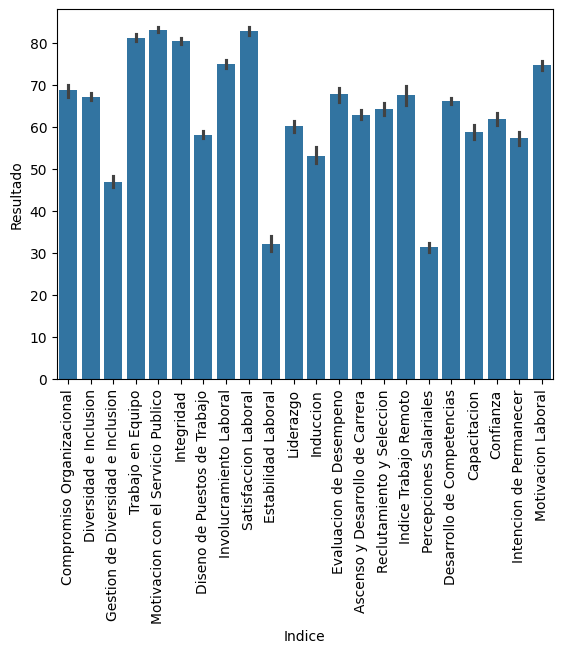

In [13]:

sns.barplot(x='Indice', y='Resultado', data=df_resumen_indicadores)
xticks = plt.xticks(rotation=90)
plt.show()

## Graficos por sector / servicio
el gráfico de sector con promedio simple



In [14]:
df.query("`Servicio`=='Todos' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indice'") #`Indice` == 'Satisfaccion Laboral' & 

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion,Dimensión,Sector
0,Todos,Todos,Todos,Compromiso Organizacional,Compromiso Organizacional,Indice,69,Indice,Actitudes Laborales,Todos
8,Todos,Todos,Todos,Diversidad e Inclusion,Diversidad e Inclusion,Indice,67,Indice,Actitudes Laborales,Todos
11,Todos,Todos,Todos,Gestion de Diversidad e Inclusion,Gestion de Diversidad e Inclusion,Indice,46,Indice,Prácticas de Gestión de Personas,Todos
20,Todos,Todos,Todos,Trabajo en Equipo,Trabajo en Equipo,Indice,80,Indice,Prácticas de Gestión de Personas,Todos
23,Todos,Todos,Todos,Motivacion con el Servicio Publico,Motivacion con el Servicio Publico,Indice,83,Indice,Actitudes Laborales,Todos
32,Todos,Todos,Todos,Integridad,Integridad,Indice,79,Indice,Actitudes Laborales,Todos
33,Todos,Todos,Todos,Diseno de Puestos de Trabajo,Diseno de Puestos de Trabajo,Indice,58,Indice,Prácticas de Gestión de Personas,Todos
45,Todos,Todos,Todos,Involucramiento Laboral,Involucramiento Laboral,Indice,76,Indice,Actitudes Laborales,Todos
46,Todos,Todos,Todos,Satisfaccion Laboral,Estoy satisfecho/a con mi trabajo,Indice,83,% de encuestados que selecciona opciones de ac...,Actitudes Laborales,Todos
48,Todos,Todos,Todos,Estabilidad Laboral,Estabilidad Laboral,Indice,35,Indice,Prácticas de Gestión de Personas,Todos


## grafico de comparación entre mejores y peores por indice

In [27]:
option_1='Ministerio de Defensa Nacional'
option_2='Subsecretaria de Defensa'
#option_1='Todos'


In [ ]:


indices=df['Indice'].unique()
Maximo=[]
Minimo=[]
Servicio_Maximo=[]
Servicio_Minimo=[]
Indice=[]
for indice in indices:
    if option_1!='Todos':
        datos_x_indice=df.query(f"Sector=='{option_1}' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indice' & Indice=='{indice}' & Resultado!='Respuentas Insuffientes (<10)'")
    else:
        datos_x_indice=df.query(f"Servicio!='Todos' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indice' & Indice=='{indice}' & Resultado!='Respuentas Insuffientes (<10)'")
    for i in range(datos_x_indice.shape[0]):
        if i==0:
            ResultadoMaximo=datos_x_indice.iloc[i]['Resultado']
            ServicioMaximo=datos_x_indice.iloc[i]['Servicio']
            ResultadoMinimo=datos_x_indice.iloc[i]['Resultado']
        else:
            if datos_x_indice.iloc[i]['Resultado']>ResultadoMaximo:
                ResultadoMaximo=datos_x_indice.iloc[i]['Resultado']
                ServicioMaximo=datos_x_indice.iloc[i]['Servicio']
            if datos_x_indice.iloc[i]['Resultado']<ResultadoMinimo:
                ResultadoMinimo=datos_x_indice.iloc[i]['Resultado']
                ServicioMinimo=datos_x_indice.iloc[i]['Servicio']
    #display(f"El servicio con mayor {indice} es {ServicioMaximo} con {ResultadoMaximo}")
    #display(f"El servicio con menor {indice} es {ServicioMinimo} con {ResultadoMinimo}")
    Maximo.append(ResultadoMaximo)
    Minimo.append(ResultadoMinimo)
    Servicio_Maximo.append(ServicioMaximo)
    Servicio_Minimo.append(ServicioMinimo)
    Indice.append(indice)
df_max=pd.DataFrame({'Indice':Indice,'Categoria':'Maximo','Resultado':Maximo,'Servicio':Servicio_Maximo})
df_min=pd.DataFrame({'Indice':Indice,'Categoria':'Minimo','Resultado':Minimo,'Servicio':Servicio_Minimo})
df_max_min=pd.concat([df_max,df_min])
df_max_min.sort_values(by=['Indice','Categoria'],inplace=True)
df_max_min['Row_number'] = np.where(df_max_min.reset_index().index==0,0,df_max_min.reset_index().index*0.5)-0.3
df_max_min['Sector']=option_1   
df_max_min


In [16]:
df_min=df.query(f"Sector=='{option_1}' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indicador' & Resultado!='Respuentas Insuffientes (<10)'")
data_indicadores_min=df_min.groupby('Indicador')['Resultado'].min().reset_index()
data_indicadores_min.sort_values(by='Resultado',inplace=True)
data_indicadores_min['Categoria']='Minimo'
data_indicadores_min=pd.merge(data_indicadores_min,df_min,how='left',on=['Indicador','Resultado'])
data_indicadores_min.drop(columns=['Caracteristica de Comparacion','Valor de la Caracteristica de Comparacion','Tipo','Codificacion'],inplace=True)
data_indicadores_min=data_indicadores_min.head(10)
data_indicadores_min

,Indicador,Resultado,Categoria,Servicio,Indice,Dimensión,Sector
0,"A su juicio, ?su servicio abordo satisfactoria...",0,Minimo,Direccion de Prevision de Carabineros de Chile,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
1,% que ha trabajado a distancia al menos un dia...,1,Minimo,Direccion General de Movilizacion Nacional,Indice Trabajo Remoto,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
2,Mi remuneracion aumenta si logro un buen desem...,10,Minimo,Direccion General de Movilizacion Nacional,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
3,Las practicas de reclutamiento y seleccion en ...,17,Minimo,Subsecretaria de Defensa,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
4,Estoy satisfecho/a con mi remuneracion,18,Minimo,Direccion de Prevision de Carabineros de Chile,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
5,Tengo una carga laboral excesiva,18,Minimo,Subsecretaria de Defensa,Diseno de Puestos de Trabajo,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
6,?Ha usado plataformas de inteligencia artifici...,19,Minimo,Caja de Prevision de la Defensa Nacional,Desarrollo de Competencias,Actitudes Laborales,Ministerio de Defensa Nacional
7,"En mi servicio, tengo buenas oportunidades par...",22,Minimo,Subsecretaria de Defensa,Ascenso y Desarrollo de Carrera,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
8,Mi remuneracion es suficiente para mantener mi...,22,Minimo,Direccion de Prevision de Carabineros de Chile,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
9,Las oportunidades de desarrollo de carrera en ...,23,Minimo,Subsecretaria de Defensa,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional


In [17]:
df_max=df.query(f"Sector=='{option_1}' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indicador' & Resultado!='Respuentas Insuffientes (<10)'")
data_indicadores_max=df_max.groupby('Indicador')['Resultado'].max().reset_index()
data_indicadores_max.sort_values(by='Resultado',ascending=False,inplace=True)
data_indicadores_max['Categoria']='Maximo'
data_indicadores_max.head(10)

,Indicador,Resultado,Categoria
21,"Como funcionarios/as, debemos entregar un serv...",100,Maximo
9,% que quisiera trabajar a distancia por lo men...,100,Maximo
54,Me motiva aprender nuevos conocimientos para m...,100,Maximo
2,% que ha tenido una evaluacion de desempeno en...,98,Maximo
89,Tengo las competencias necesarias para cumplir...,98,Maximo
7,% que indica que el apoyo de un/a politico/a o...,98,Maximo
77,Para mi es importante que mi trabajo contribuy...,97,Maximo
85,Si me ofrecieran un regalo personal a cambio d...,95,Maximo
80,Realizo tareas adicionales a mi trabajo aunque...,93,Maximo
1,% que cree que el apoyo de un/a politico/a o d...,93,Maximo


In [18]:
df_min=df.query(f"Sector=='{option_1}' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indicador' & Resultado!='Respuentas Insuffientes (<10)'")
data_indicadores_min=df_min.groupby('Indicador')['Resultado'].min().reset_index()
data_indicadores_min.sort_values(by='Resultado',inplace=True)
data_indicadores_min['Categoria']='Minimo'
data_indicadores_min=pd.merge(data_indicadores_min,df_min,how='left',on=['Indicador','Resultado'])
data_indicadores_min.drop(columns=['Caracteristica de Comparacion','Valor de la Caracteristica de Comparacion','Tipo','Codificacion'],inplace=True)
data_indicadores_min=data_indicadores_min.head(10)
df_max=df.query(f"Sector=='{option_1}' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indicador' & Resultado!='Respuentas Insuffientes (<10)'")
data_indicadores_max=df_max.groupby('Indicador')['Resultado'].max().reset_index()
data_indicadores_max.sort_values(by='Resultado',ascending=False,inplace=True)
data_indicadores_max['Categoria']='Maximo'
data_indicadores_max=pd.merge(data_indicadores_max,df_max,how='left',on=['Indicador','Resultado'])
data_indicadores_max.drop(columns=['Caracteristica de Comparacion','Valor de la Caracteristica de Comparacion','Tipo','Codificacion'],inplace=True)
data_indicadores_max=data_indicadores_max.head(10)
data_indicadores_min_max=pd.concat([data_indicadores_min,data_indicadores_max])
data_indicadores_min_max

,Indicador,Resultado,Categoria,Servicio,Indice,Dimensión,Sector
0,"A su juicio, ?su servicio abordo satisfactoria...",0,Minimo,Direccion de Prevision de Carabineros de Chile,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
1,% que ha trabajado a distancia al menos un dia...,1,Minimo,Direccion General de Movilizacion Nacional,Indice Trabajo Remoto,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
2,Mi remuneracion aumenta si logro un buen desem...,10,Minimo,Direccion General de Movilizacion Nacional,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
3,Las practicas de reclutamiento y seleccion en ...,17,Minimo,Subsecretaria de Defensa,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
4,Estoy satisfecho/a con mi remuneracion,18,Minimo,Direccion de Prevision de Carabineros de Chile,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
5,Tengo una carga laboral excesiva,18,Minimo,Subsecretaria de Defensa,Diseno de Puestos de Trabajo,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
6,?Ha usado plataformas de inteligencia artifici...,19,Minimo,Caja de Prevision de la Defensa Nacional,Desarrollo de Competencias,Actitudes Laborales,Ministerio de Defensa Nacional
7,"En mi servicio, tengo buenas oportunidades par...",22,Minimo,Subsecretaria de Defensa,Ascenso y Desarrollo de Carrera,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
8,Mi remuneracion es suficiente para mantener mi...,22,Minimo,Direccion de Prevision de Carabineros de Chile,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
9,Las oportunidades de desarrollo de carrera en ...,23,Minimo,Subsecretaria de Defensa,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional


In [19]:

data_indicadores_min_max=pd.concat([data_indicadores_min,data_indicadores_max])

In [20]:
data_indicadores_min


,Indicador,Resultado,Categoria,Servicio,Indice,Dimensión,Sector
0,"A su juicio, ?su servicio abordo satisfactoria...",0,Minimo,Direccion de Prevision de Carabineros de Chile,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
1,% que ha trabajado a distancia al menos un dia...,1,Minimo,Direccion General de Movilizacion Nacional,Indice Trabajo Remoto,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
2,Mi remuneracion aumenta si logro un buen desem...,10,Minimo,Direccion General de Movilizacion Nacional,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
3,Las practicas de reclutamiento y seleccion en ...,17,Minimo,Subsecretaria de Defensa,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
4,Estoy satisfecho/a con mi remuneracion,18,Minimo,Direccion de Prevision de Carabineros de Chile,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
5,Tengo una carga laboral excesiva,18,Minimo,Subsecretaria de Defensa,Diseno de Puestos de Trabajo,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
6,?Ha usado plataformas de inteligencia artifici...,19,Minimo,Caja de Prevision de la Defensa Nacional,Desarrollo de Competencias,Actitudes Laborales,Ministerio de Defensa Nacional
7,"En mi servicio, tengo buenas oportunidades par...",22,Minimo,Subsecretaria de Defensa,Ascenso y Desarrollo de Carrera,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
8,Mi remuneracion es suficiente para mantener mi...,22,Minimo,Direccion de Prevision de Carabineros de Chile,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
9,Las oportunidades de desarrollo de carrera en ...,23,Minimo,Subsecretaria de Defensa,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional


In [21]:
data_indicadores_max

,Indicador,Resultado,Categoria,Servicio,Indice,Dimensión,Sector
0,"Como funcionarios/as, debemos entregar un serv...",100,Maximo,Subsecretaria de Defensa,Motivacion con el Servicio Publico,Actitudes Laborales,Ministerio de Defensa Nacional
1,% que quisiera trabajar a distancia por lo men...,100,Maximo,Direccion de Prevision de Carabineros de Chile,Indice Trabajo Remoto,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
2,Me motiva aprender nuevos conocimientos para m...,100,Maximo,Subsecretaria de Defensa,Desarrollo de Competencias,Actitudes Laborales,Ministerio de Defensa Nacional
3,% que ha tenido una evaluacion de desempeno en...,98,Maximo,Subsecretaria de Defensa,Evaluacion de Desempeno,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
4,Tengo las competencias necesarias para cumplir...,98,Maximo,Subsecretaria de Defensa,Desarrollo de Competencias,Actitudes Laborales,Ministerio de Defensa Nacional
5,% que indica que el apoyo de un/a politico/a o...,98,Maximo,Direccion de Prevision de Carabineros de Chile,Reclutamiento y Seleccion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
6,Para mi es importante que mi trabajo contribuy...,97,Maximo,Subsecretaria de Defensa,Motivacion con el Servicio Publico,Actitudes Laborales,Ministerio de Defensa Nacional
7,Si me ofrecieran un regalo personal a cambio d...,95,Maximo,Caja de Prevision de la Defensa Nacional,Integridad,Actitudes Laborales,Ministerio de Defensa Nacional
8,Si me ofrecieran un regalo personal a cambio d...,95,Maximo,Direccion de Prevision de Carabineros de Chile,Integridad,Actitudes Laborales,Ministerio de Defensa Nacional
9,Realizo tareas adicionales a mi trabajo aunque...,93,Maximo,Subsecretaria de Defensa,Motivacion Laboral,Actitudes Laborales,Ministerio de Defensa Nacional


In [22]:
data_indicadores_min_max

,Indicador,Resultado,Categoria,Servicio,Indice,Dimensión,Sector
0,"A su juicio, ?su servicio abordo satisfactoria...",0,Minimo,Direccion de Prevision de Carabineros de Chile,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
1,% que ha trabajado a distancia al menos un dia...,1,Minimo,Direccion General de Movilizacion Nacional,Indice Trabajo Remoto,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
2,Mi remuneracion aumenta si logro un buen desem...,10,Minimo,Direccion General de Movilizacion Nacional,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
3,Las practicas de reclutamiento y seleccion en ...,17,Minimo,Subsecretaria de Defensa,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
4,Estoy satisfecho/a con mi remuneracion,18,Minimo,Direccion de Prevision de Carabineros de Chile,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
5,Tengo una carga laboral excesiva,18,Minimo,Subsecretaria de Defensa,Diseno de Puestos de Trabajo,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
6,?Ha usado plataformas de inteligencia artifici...,19,Minimo,Caja de Prevision de la Defensa Nacional,Desarrollo de Competencias,Actitudes Laborales,Ministerio de Defensa Nacional
7,"En mi servicio, tengo buenas oportunidades par...",22,Minimo,Subsecretaria de Defensa,Ascenso y Desarrollo de Carrera,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
8,Mi remuneracion es suficiente para mantener mi...,22,Minimo,Direccion de Prevision de Carabineros de Chile,Percepciones Salariales,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
9,Las oportunidades de desarrollo de carrera en ...,23,Minimo,Subsecretaria de Defensa,Gestion de Diversidad e Inclusion,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional


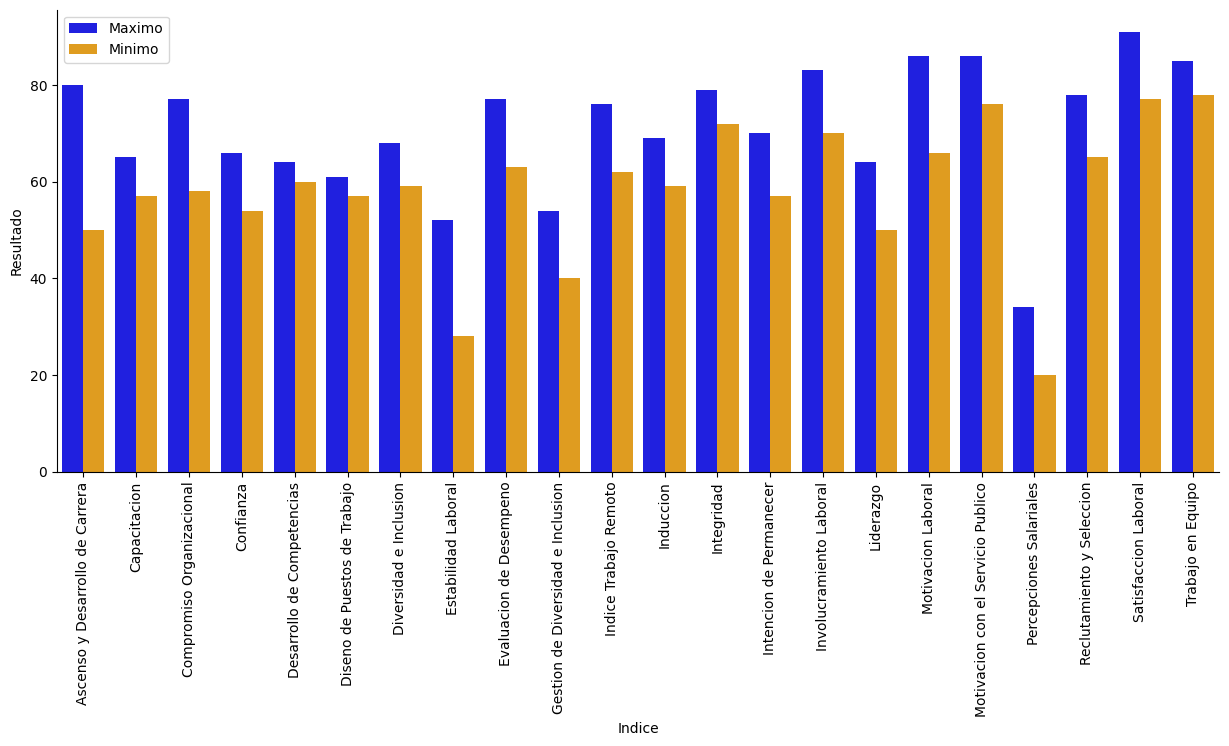

In [23]:
# Definir un diccionario de colores para las categorías
categoria_colors = {
    'Minimo': 'orange',
    'Maximo': 'blue'
}

# Crear una lista de colores basada en la paleta definida en category_colors
colors = [categoria_colors[c] for c in df_max_min['Categoria'].unique()]

plt.figure(figsize=(15, 6))
sns.barplot(x='Indice', y='Resultado', data=df_max_min,hue='Categoria',palette=colors)
plt.xticks(rotation=90)
# Agregar etiquetas
for index, row in df_max_min.iterrows():
    plt.annotate(row['Servicio'],
                 xy=(row['Row_number'], 100),
                 xytext=(0, 15),
                 textcoords='offset points',
                 #color='blue',
                 color=categoria_colors[row['Categoria']],  # Color basado en la categoría
                 rotation=90)
plt.legend(loc='best')
# Eliminar las líneas de enmarcado
sns.despine()
plt.show()

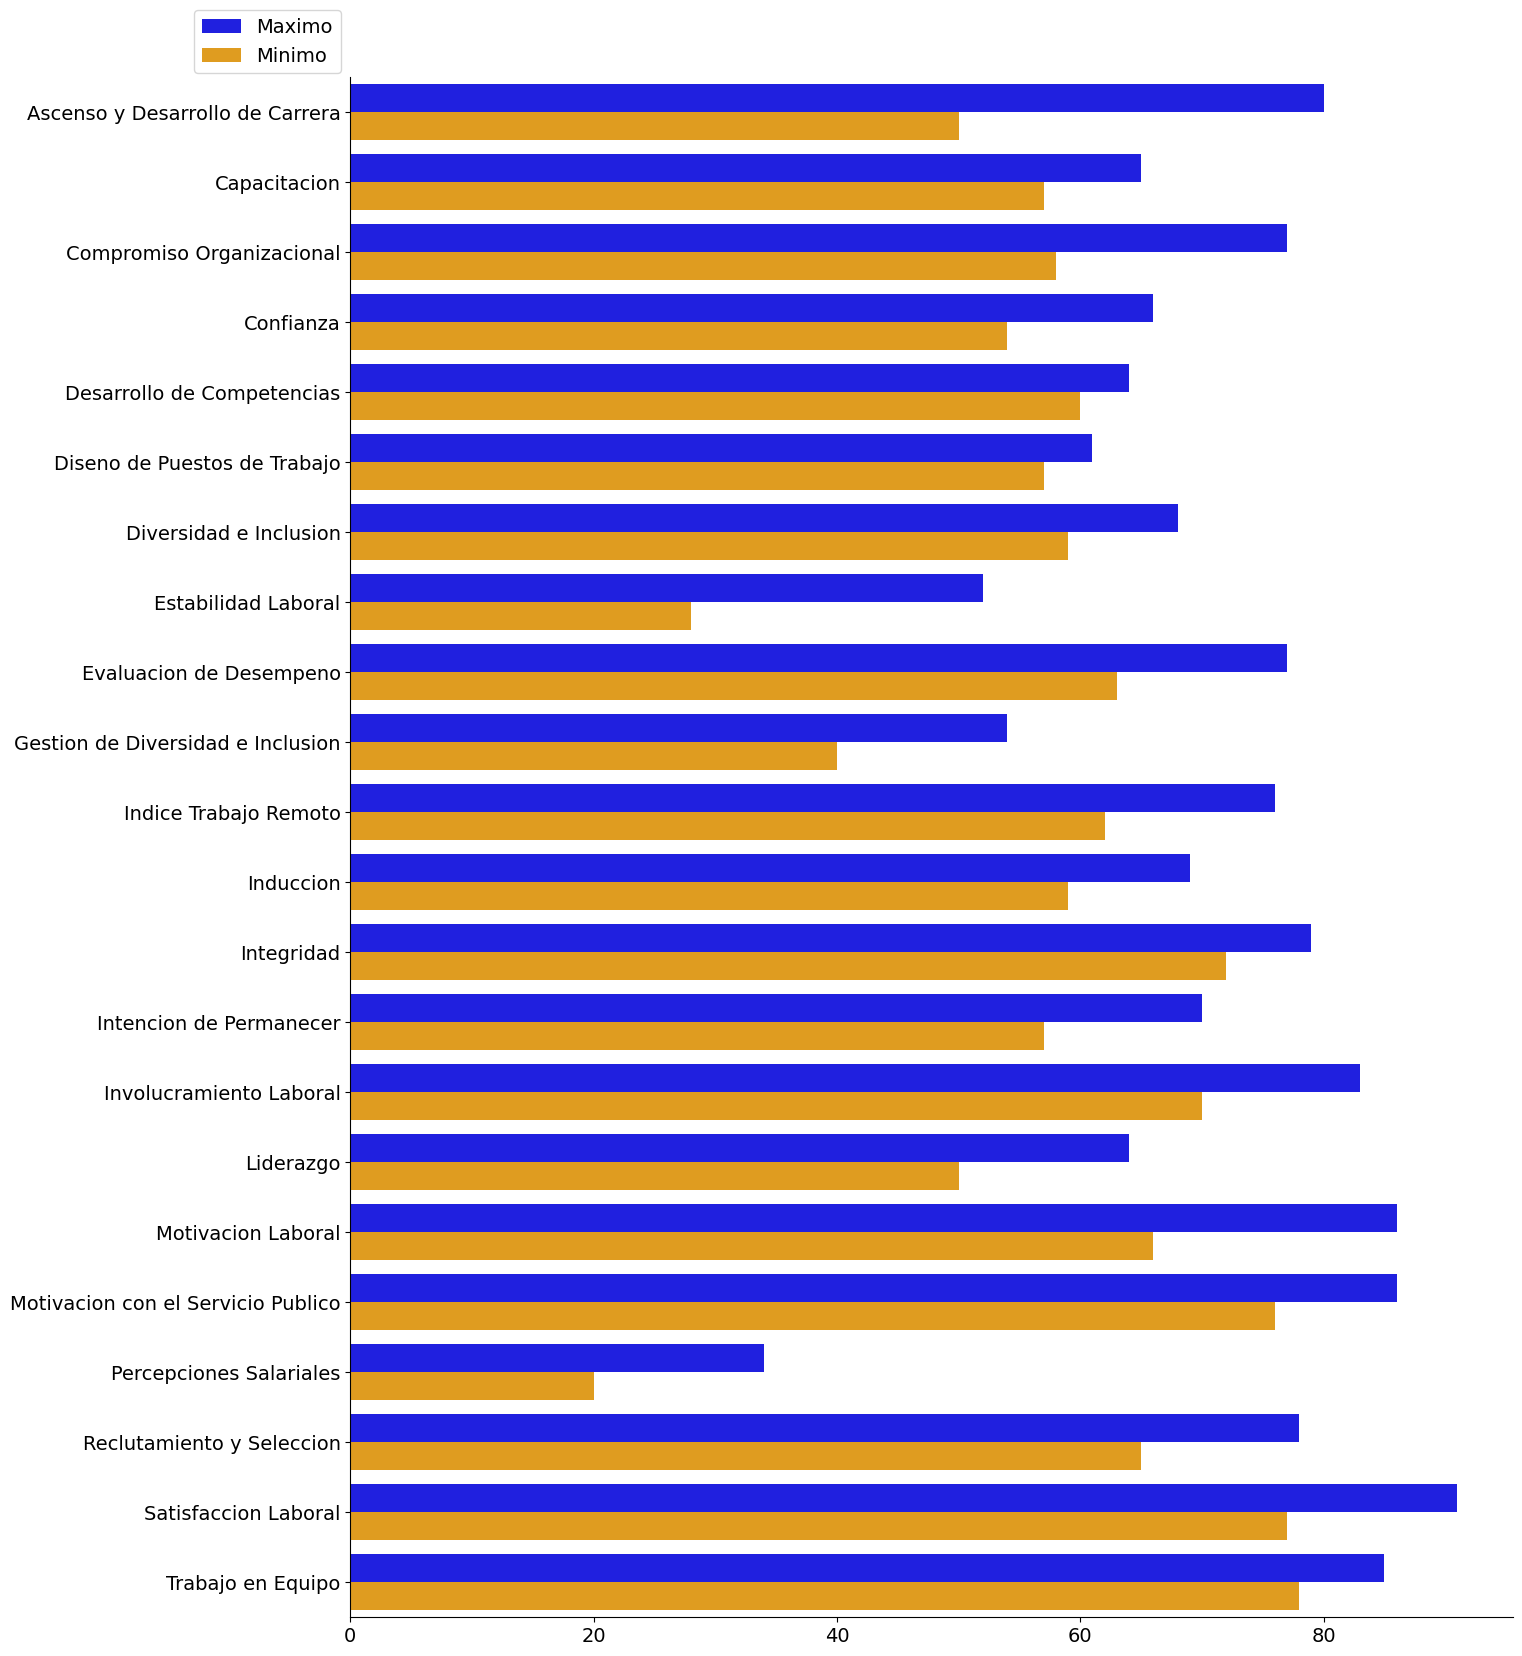

In [24]:
# Definir un diccionario de colores para las categorías
categoria_colors = {
    'Minimo': 'orange',
    'Maximo': 'blue'
}

# Crear una lista de colores basada en la paleta definida en category_colors
colors = [categoria_colors[c] for c in df_max_min['Categoria'].unique()]

plt.figure(figsize=(15, 20))
sns.barplot(y='Indice', x='Resultado', data=df_max_min,hue='Categoria',palette=colors)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')
plt.xlabel('')
#plt.yticks(rotation=90)
# Agregar etiquetas
for index, row in df_max_min.iterrows():
    plt.annotate(row['Servicio'],
                 #xy=(0,row['Row_number']),
                 xy=(100,row['Row_number']),
                 xytext=(15,0),
                 textcoords='offset points',
                 fontsize=14,
                 color=categoria_colors[row['Categoria']],)  # Color basado en la categoría
plt.legend(bbox_to_anchor=(0, 1.05),fontsize=14)
# Eliminar las líneas de enmarcado
sns.despine()
plt.show()

## gráfico de comparacion por rango etario

## gráfico de comparacion por género

In [40]:
df.query(f"Sector=='{option_1}' & Servicio=='{option_2}'  & `Caracteristica de Comparacion`=='Genero' & Tipo=='Indice' & Codificacion=='Indice' & Resultado!='Respuentas Insuffientes (<10)'")#.groupby(['Valor de la Caracteristica de Comparacion','Indice'])['Resultado'].mean().reset_index()

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion,Dimensión,Sector
2399,Subsecretaria de Defensa,Genero,Femenino,Compromiso Organizacional,Compromiso Organizacional,Indice,33,Indice,Actitudes Laborales,Ministerio de Defensa Nacional
2400,Subsecretaria de Defensa,Genero,Masculino,Compromiso Organizacional,Compromiso Organizacional,Indice,71,Indice,Actitudes Laborales,Ministerio de Defensa Nacional
2415,Subsecretaria de Defensa,Genero,Femenino,Diversidad e Inclusion,Diversidad e Inclusion,Indice,75,Indice,Actitudes Laborales,Ministerio de Defensa Nacional
2416,Subsecretaria de Defensa,Genero,Masculino,Diversidad e Inclusion,Diversidad e Inclusion,Indice,59,Indice,Actitudes Laborales,Ministerio de Defensa Nacional
2421,Subsecretaria de Defensa,Genero,Femenino,Gestion de Diversidad e Inclusion,Gestion de Diversidad e Inclusion,Indice,30,Indice,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
2422,Subsecretaria de Defensa,Genero,Masculino,Gestion de Diversidad e Inclusion,Gestion de Diversidad e Inclusion,Indice,43,Indice,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
2439,Subsecretaria de Defensa,Genero,Femenino,Trabajo en Equipo,Trabajo en Equipo,Indice,78,Indice,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
2440,Subsecretaria de Defensa,Genero,Masculino,Trabajo en Equipo,Trabajo en Equipo,Indice,83,Indice,Prácticas de Gestión de Personas,Ministerio de Defensa Nacional
2445,Subsecretaria de Defensa,Genero,Femenino,Motivacion con el Servicio Publico,Motivacion con el Servicio Publico,Indice,71,Indice,Actitudes Laborales,Ministerio de Defensa Nacional
2446,Subsecretaria de Defensa,Genero,Masculino,Motivacion con el Servicio Publico,Motivacion con el Servicio Publico,Indice,92,Indice,Actitudes Laborales,Ministerio de Defensa Nacional


In [41]:
option_2='Todos'

In [44]:
df.query(f"Sector=='{option_1}'  & `Caracteristica de Comparacion`=='Genero' & Tipo=='Indice' & Codificacion=='Indice' & Resultado!='Respuentas Insuffientes (<10)'").groupby(['Valor de la Caracteristica de Comparacion','Indice'])['Resultado'].mean().reset_index()

,Valor de la Caracteristica de Comparacion,Indice,Resultado
0,Femenino,Ascenso y Desarrollo de Carrera,61.5
1,Femenino,Capacitacion,58.0
2,Femenino,Compromiso Organizacional,60.25
3,Femenino,Confianza,52.75
4,Femenino,Desarrollo de Competencias,62.75
5,Femenino,Diseno de Puestos de Trabajo,58.75
6,Femenino,Diversidad e Inclusion,71.0
7,Femenino,Estabilidad Laboral,45.25
8,Femenino,Evaluacion de Desempeno,72.0
9,Femenino,Gestion de Diversidad e Inclusion,44.0


In [ ]:
df[df['Indice']=='Compromiso Organizacional']['Indicador'].unique()


array(['Compromiso Organizacional',
       'Siento una fuerte pertenencia a mi servicio',
       'Recomendaria mi servicio como un buen lugar para trabajar'],
      dtype=object)

In [ ]:
df.query("Servicio=='Servicio Agricola y Ganadero' & Indice=='Compromiso Organizacional' & Tipo=='Indice'")

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion
199080,Servicio Agricola y Ganadero,Todos,Todos,Compromiso Organizacional,Compromiso Organizacional,Indice,72,Indice
199195,Servicio Agricola y Ganadero,Genero,Femenino,Compromiso Organizacional,Compromiso Organizacional,Indice,70,Indice
199196,Servicio Agricola y Ganadero,Genero,Masculino,Compromiso Organizacional,Compromiso Organizacional,Indice,75,Indice
199425,Servicio Agricola y Ganadero,Edad,Personas de mas edad (40+ anos),Compromiso Organizacional,Compromiso Organizacional,Indice,76,Indice
199426,Servicio Agricola y Ganadero,Edad,Personas mas jovenes (<40 anos),Compromiso Organizacional,Compromiso Organizacional,Indice,66,Indice
199655,Servicio Agricola y Ganadero,Anos de servicio publico,Personas con mayor antiguedad en el servicio (...,Compromiso Organizacional,Compromiso Organizacional,Indice,74,Indice
199656,Servicio Agricola y Ganadero,Anos de servicio publico,Personas con menor antiguedad en el servicio (...,Compromiso Organizacional,Compromiso Organizacional,Indice,66,Indice
199869,Servicio Agricola y Ganadero,Nivel educativo,Personas con titulo universitario,Compromiso Organizacional,Compromiso Organizacional,Indice,72,Indice
199870,Servicio Agricola y Ganadero,Nivel educativo,Personas sin titulo universitario,Compromiso Organizacional,Compromiso Organizacional,Indice,73,Indice
200099,Servicio Agricola y Ganadero,Tipo de contrato,Codigo del Trabajo,Compromiso Organizacional,Compromiso Organizacional,Indice,63,Indice


In [ ]:
df.query("Servicio=='Servicio Agricola y Ganadero' & Indice=='Compromiso Organizacional' & Tipo!='Indice'")

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion
199081,Servicio Agricola y Ganadero,Todos,Todos,Compromiso Organizacional,Siento una fuerte pertenencia a mi servicio,Indicador,75,% de encuestados que selecciona opciones de ac...
199082,Servicio Agricola y Ganadero,Todos,Todos,Compromiso Organizacional,Recomendaria mi servicio como un buen lugar pa...,Indicador,70,% de encuestados que selecciona opciones de ac...
199197,Servicio Agricola y Ganadero,Genero,Femenino,Compromiso Organizacional,Siento una fuerte pertenencia a mi servicio,Indicador,73,% de encuestados que selecciona opciones de ac...
199198,Servicio Agricola y Ganadero,Genero,Masculino,Compromiso Organizacional,Siento una fuerte pertenencia a mi servicio,Indicador,77,% de encuestados que selecciona opciones de ac...
199199,Servicio Agricola y Ganadero,Genero,Femenino,Compromiso Organizacional,Recomendaria mi servicio como un buen lugar pa...,Indicador,66,% de encuestados que selecciona opciones de ac...
199200,Servicio Agricola y Ganadero,Genero,Masculino,Compromiso Organizacional,Recomendaria mi servicio como un buen lugar pa...,Indicador,74,% de encuestados que selecciona opciones de ac...
199427,Servicio Agricola y Ganadero,Edad,Personas de mas edad (40+ anos),Compromiso Organizacional,Siento una fuerte pertenencia a mi servicio,Indicador,80,% de encuestados que selecciona opciones de ac...
199428,Servicio Agricola y Ganadero,Edad,Personas mas jovenes (<40 anos),Compromiso Organizacional,Siento una fuerte pertenencia a mi servicio,Indicador,66,% de encuestados que selecciona opciones de ac...
199429,Servicio Agricola y Ganadero,Edad,Personas de mas edad (40+ anos),Compromiso Organizacional,Recomendaria mi servicio como un buen lugar pa...,Indicador,72,% de encuestados que selecciona opciones de ac...
199430,Servicio Agricola y Ganadero,Edad,Personas mas jovenes (<40 anos),Compromiso Organizacional,Recomendaria mi servicio como un buen lugar pa...,Indicador,65,% de encuestados que selecciona opciones de ac...


# Valores

In [ ]:
df.Servicio.value_counts()

Servicio
Todos                                               2284
Subsecretaria del Medio Ambiente                    2284
Subsecretaria de Servicios Sociales                 2284
Municipalidad de Cerrillos                          2284
Servicio Agricola y Ganadero                        2284
                                                    ... 
Servicio Local de Educacion Publica Andalien Sur    1832
Servicio Local de Educacion Publica Magallanes      1832
Subsecretaria de Educacion Parvularia               1832
Subsecretaria de Prevision Social                   1824
Subsecretaria de Defensa                            1824
Name: count, Length: 128, dtype: int64

In [ ]:
df['Caracteristica de Comparacion'].unique()

array(['Todos', 'Genero', 'Edad', 'Anos de servicio publico',
       'Nivel educativo', 'Tipo de contrato', 'Estamento',
       'Situacion de discapacidad', 'Pertenencia a pueblos originarios'],
      dtype=object)